Import Necessary Libraries

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier # Another implementation of new model
from sklearn.inspection import permutation_importance # For interpretability
from sklearn.ensemble import GradientBoostingClassifier # New model
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap

ModuleNotFoundError: No module named 'shap'

Identify Target
Others are target
Identify Data Leakage
Clean and Wrangle the data
Identify Nulls and determine what to do with them since they must be useful
Create Models


In [40]:
#Import and read in the DataSet
Sleep = pd.read_csv("sleepdata1.csv",sep = ';')

In [41]:
#Drop Start and End Columns since the difference = Time in bed column
Sleep.drop(columns=['Start', 'End'], inplace = True)

In [42]:
#Look at the Data
Sleep.head(50)

,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,100%,8:32,:),NaN,59.0,0
1,3%,0:16,:|,Stressful day,72.0,0
2,98%,8:30,:|,NaN,57.0,0
3,65%,7:32,NaN,NaN,NaN,0
4,72%,6:44,:),Drank coffee:Drank tea,68.0,0
5,83%,7:12,:),Drank coffee:Drank tea,60.0,0
6,78%,7:14,NaN,Drank tea,NaN,0
7,78%,7:18,:),Ate late:Drank coffee,57.0,0
8,69%,7:27,:),Drank coffee:Drank tea:Worked out,56.0,0
9,74%,7:35,:|,Drank tea:Worked out,64.0,0


In [43]:
#Look if the DataSet has any Null values
Sleep.isnull().sum()

Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

Target = Sleep Quality
Features =  Time in Bed, Wake up, Wake up-null, Sleep Notes, Heart Rate

So predict Sleep Quality from Time in Bed, Sleep Notes, Heart Rate


In [44]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sleep quality     887 non-null    object 
 1   Time in bed       887 non-null    object 
 2   Wake up           246 non-null    object 
 3   Sleep Notes       652 non-null    object 
 4   Heart rate        162 non-null    float64
 5   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.7+ KB


In [45]:
Sleep['Wake up'].value_counts()

:)    216
:|     29
:(      1
Name: Wake up, dtype: int64

In [46]:
type(Sleep['Wake up'][0])

str

In [47]:
Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\)', 'Happy')
Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\|', 'Okay')
Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\(', 'Sad')

Sleep.head(50)

<ipython-input-47-9adf916ef430>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\)', 'Happy')
<ipython-input-47-9adf916ef430>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\|', 'Okay')
<ipython-input-47-9adf916ef430>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Sleep['Wake up'] = Sleep['Wake up'].str.replace(':\(', 'Sad')


,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,100%,8:32,Happy,NaN,59.0,0
1,3%,0:16,Okay,Stressful day,72.0,0
2,98%,8:30,Okay,NaN,57.0,0
3,65%,7:32,NaN,NaN,NaN,0
4,72%,6:44,Happy,Drank coffee:Drank tea,68.0,0
5,83%,7:12,Happy,Drank coffee:Drank tea,60.0,0
6,78%,7:14,NaN,Drank tea,NaN,0
7,78%,7:18,Happy,Ate late:Drank coffee,57.0,0
8,69%,7:27,Happy,Drank coffee:Drank tea:Worked out,56.0,0
9,74%,7:35,Okay,Drank tea:Worked out,64.0,0


In [48]:
Sleep['Wake_up_MISSING'] = Sleep['Wake up'].isnull().astype(int)
Sleep['SleepNotes_MISSING'] = Sleep['Sleep Notes'].isnull().astype(int)
Sleep['HeartRate_MISSING'] = Sleep['Heart rate'].isnull().astype(int)

In [49]:
Sleep.head(30)

,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Wake_up_MISSING,SleepNotes_MISSING,HeartRate_MISSING
0,100%,8:32,Happy,NaN,59.0,0,0,1,0
1,3%,0:16,Okay,Stressful day,72.0,0,0,0,0
2,98%,8:30,Okay,NaN,57.0,0,0,1,0
3,65%,7:32,NaN,NaN,NaN,0,1,1,1
4,72%,6:44,Happy,Drank coffee:Drank tea,68.0,0,0,0,0
5,83%,7:12,Happy,Drank coffee:Drank tea,60.0,0,0,0,0
6,78%,7:14,NaN,Drank tea,NaN,0,1,0,1
7,78%,7:18,Happy,Ate late:Drank coffee,57.0,0,0,0,0
8,69%,7:27,Happy,Drank coffee:Drank tea:Worked out,56.0,0,0,0,0
9,74%,7:35,Okay,Drank tea:Worked out,64.0,0,0,0,0


In [50]:
Sleep['Activity (steps)'].value_counts()

0       418
4540      2
5184      2
27        2
5216      2
       ... 
3400      1
1867      1
7491      1
5579      1
787       1
Name: Activity (steps), Length: 449, dtype: int64

In [51]:
#Change
Sleep['Activity (steps)'] =Sleep['Activity (steps)'].replace(0, np.nan)
Sleep['Activity (steps)_MISSING'] =Sleep['Activity (steps)'].isnull().astype(int)

In [52]:
Sleep.head(30)

,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Wake_up_MISSING,SleepNotes_MISSING,HeartRate_MISSING,Activity (steps)_MISSING
0,100%,8:32,Happy,NaN,59.0,NaN,0,1,0,1
1,3%,0:16,Okay,Stressful day,72.0,NaN,0,0,0,1
2,98%,8:30,Okay,NaN,57.0,NaN,0,1,0,1
3,65%,7:32,NaN,NaN,NaN,NaN,1,1,1,1
4,72%,6:44,Happy,Drank coffee:Drank tea,68.0,NaN,0,0,0,1
5,83%,7:12,Happy,Drank coffee:Drank tea,60.0,NaN,0,0,0,1
6,78%,7:14,NaN,Drank tea,NaN,NaN,1,0,1,1
7,78%,7:18,Happy,Ate late:Drank coffee,57.0,NaN,0,0,0,1
8,69%,7:27,Happy,Drank coffee:Drank tea:Worked out,56.0,NaN,0,0,0,1
9,74%,7:35,Okay,Drank tea:Worked out,64.0,NaN,0,0,0,1


In [53]:
Sleep['Sleep Notes'].value_counts()

Drank coffee:Drank tea:Worked out                  164
Drank coffee:Drank tea                             123
Drank coffee:Worked out                             91
Drank coffee                                        75
Drank tea:Worked out                                62
Drank tea                                           58
Drank coffee:Stressful day:Worked out               15
Drank coffee:Drank tea:Stressful day                14
Drank coffee:Drank tea:Stressful day:Worked out     13
Ate late:Drank coffee:Drank tea:Worked out          10
Drank coffee:Stressful day                           8
Drank tea:Stressful day:Worked out                   5
Ate late:Drank coffee:Drank tea                      5
Ate late:Drank coffee:Worked out                     3
Ate late:Drank coffee                                2
Ate late:Drank coffee:Drank tea:Stressful day        1
Drank tea:Stressful day                              1
Stressful day                                        1
Worked out

Activity List

Drank coffee
Drank tea
Worked out 
Stressful day
Ate late

In [54]:
Activity_List = ['Drank coffee','Drank tea', 'Worked out','Stressful day','Ate late' ]

In [55]:
for Activity in Activity_List:
     Sleep[Activity] = [1 if row==row and Activity in row else 0 for row in Sleep['Sleep Notes']]

In [56]:
Sleep['Sleep quality'] = Sleep['Sleep quality'].str.strip('%').astype(int)

In [57]:
np.NaN == np.NaN

False

In [58]:
Sleep.head(40)

,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Wake_up_MISSING,SleepNotes_MISSING,HeartRate_MISSING,Activity (steps)_MISSING,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,100,8:32,Happy,NaN,59.0,NaN,0,1,0,1,0,0,0,0,0
1,3,0:16,Okay,Stressful day,72.0,NaN,0,0,0,1,0,0,0,1,0
2,98,8:30,Okay,NaN,57.0,NaN,0,1,0,1,0,0,0,0,0
3,65,7:32,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0
4,72,6:44,Happy,Drank coffee:Drank tea,68.0,NaN,0,0,0,1,1,1,0,0,0
5,83,7:12,Happy,Drank coffee:Drank tea,60.0,NaN,0,0,0,1,1,1,0,0,0
6,78,7:14,NaN,Drank tea,NaN,NaN,1,0,1,1,0,1,0,0,0
7,78,7:18,Happy,Ate late:Drank coffee,57.0,NaN,0,0,0,1,1,0,0,0,1
8,69,7:27,Happy,Drank coffee:Drank tea:Worked out,56.0,NaN,0,0,0,1,1,1,1,0,0
9,74,7:35,Okay,Drank tea:Worked out,64.0,NaN,0,0,0,1,0,1,1,0,0


In [59]:
Sleep.isnull().sum()

Sleep quality                 0
Time in bed                   0
Wake up                     641
Sleep Notes                 235
Heart rate                  725
Activity (steps)            418
Wake_up_MISSING               0
SleepNotes_MISSING            0
HeartRate_MISSING             0
Activity (steps)_MISSING      0
Drank coffee                  0
Drank tea                     0
Worked out                    0
Stressful day                 0
Ate late                      0
dtype: int64

In [75]:
Sleep['Activity (steps)'].value_counts().isnull().sum()

0

In [76]:
Sleep.corr().T

,Sleep quality,Heart rate,Activity (steps),Wake_up_MISSING,SleepNotes_MISSING,HeartRate_MISSING,Activity (steps)_MISSING,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
Sleep quality,1.000000,-0.037846,-0.136605,-0.076537,-0.158895,-0.102908,0.164848,0.107466,0.152647,0.039400,0.051173,0.022692
Heart rate,-0.037846,1.000000,NaN,NaN,-0.052454,NaN,NaN,0.078282,-0.038011,-0.038387,0.126001,-0.049067
Activity (steps),-0.136605,NaN,1.000000,NaN,-0.182284,NaN,NaN,0.148451,0.193303,0.406889,0.068557,0.061752
Wake_up_MISSING,-0.076537,NaN,NaN,1.000000,0.320561,0.763045,-0.656201,-0.310751,-0.239499,-0.128235,-0.141742,-0.069168
SleepNotes_MISSING,-0.158895,-0.052454,-0.182284,0.320561,1.000000,0.237506,-0.464419,-0.721311,-0.617524,-0.500853,-0.158799,-0.093489
HeartRate_MISSING,-0.102908,NaN,NaN,0.763045,0.237506,1.000000,-0.500711,-0.191668,-0.226036,-0.056470,-0.099231,-0.041544
Activity (steps)_MISSING,0.164848,NaN,NaN,-0.656201,-0.464419,-0.500711,1.000000,0.445851,0.149616,0.295984,0.170546,0.090672
Drank coffee,0.107466,0.078282,0.148451,-0.310751,-0.721311,-0.191668,0.445851,1.000000,0.278079,0.377399,0.155228,0.129610
Drank tea,0.152647,-0.038011,0.193303,-0.239499,-0.617524,-0.226036,0.149616,0.278079,1.000000,0.306644,0.038165,0.077210
Worked out,0.039400,-0.038387,0.406889,-0.128235,-0.500853,-0.056470,0.295984,0.377399,0.306644,1.000000,0.085279,0.066061


In [77]:
TheTarget = 'Sleep quality'

y = Sleep[TheTarget]

X = Sleep.drop(columns=[TheTarget])


In [78]:
y.shape

(887,)

In [79]:
X.shape

(887, 14)

In [80]:
#y = y.str.replace('%', '')

In [81]:
y = y.astype(int)

In [152]:
y.value_counts()

81    42
83    39
79    37
77    36
74    33
      ..
40     1
44     1
46     1
48     1
0      1
Name: Sleep quality, Length: 79, dtype: int64

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Because this is not time series we use this:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [154]:
X_train.shape

(709, 14)

In [155]:
X_test.shape

(178, 14)

In [156]:
X_val.shape

(178, 14)

In [157]:
#Target is numerical, this is a Regression problem so we use MAE to find Baseline

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 10.562094051694812


In [163]:
model_rf = make_pipeline(OneHotEncoder(),
                         SimpleImputer(),
                         LinearRegression())

#model_rf.fit(X_train, y_train);

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [164]:
mean_absolute_error(y_train, model_rf.predict(X_train))

6.102678780495196

In [165]:
mean_absolute_error(y_test, model_rf.predict(X_test))

282931505.352285

In [166]:
model_rf1 = make_pipeline(OneHotEncoder(),
                         SimpleImputer(),
                         Ridge(alpha= 2))

#model_rf1.fit(X_train, y_train);

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [167]:
mean_absolute_error(y_train, model_rf1.predict(X_train))

7.989354402752706

In [168]:
mean_absolute_error(y_test, model_rf1.predict(X_test))

10.363040916956574

In [169]:

model_rf2 = make_pipeline(OneHotEncoder(),
                         SimpleImputer(),
                         RandomForestRegressor(random_state=30,n_jobs=-1))

#model_rf2.fit(X_train, y_train);

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [170]:
mean_absolute_error(y_train, model_rf2.predict(X_train))

3.77107710390221

In [171]:
mean_absolute_error(y_test, model_rf2.predict(X_test))

10.744067415730337

If you split data train-val-test no need to use crossvalidation

If you only have train and test you wil need crossvalidation

In [172]:
print(cross_val_score(model_rf, X_train, y_train, cv=5, scoring = "neg_mean_absolute_error"))

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[-1.27468205e+07 -1.13353923e+01 -6.47547930e+07 -9.56158763e+00
 -1.79222283e+08]


C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [173]:
#This will help us calculate the mean of the list
CrossValidationScore = cross_val_score(model_rf, X_train, y_train, cv=3, scoring = "neg_mean_absolute_error")

print("Mean:", CrossValidationScore.mean())

print("StandardDeviation:", CrossValidationScore.std())

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Mean: -3070908.2557654288
StandardDeviation: 4342904.613151958


In [174]:
CrossValidationScore = cross_val_score(model_rf1, X_train, y_train, cv=3, scoring = "neg_mean_absolute_error")

print("Mean:", CrossValidationScore.mean())

print("StandardDeviation:", CrossValidationScore.std())

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Mean: -10.266252779201581
StandardDeviation: 0.38078763157095213


C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [175]:
CrossValidationScore = cross_val_score(model_rf2, X_train, y_train, cv=3, scoring = "neg_mean_absolute_error")

print("Mean:", CrossValidationScore.mean())

print("StandardDeviation:", CrossValidationScore.std())

C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Mean: -10.212301863572433
StandardDeviation: 0.1988448572227807


CrossValidation Score is better to check the performance of your model
Mean needs to be less that MAE for best Model

In [176]:
model_rf2

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Time in bed', 'Wake up', 'Sleep Notes'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=30))])

In [177]:
param_grid = {'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
              'randomforestregressor__max_depth': [15,20,25,30,35],
              'randomforestregressor__n_estimators': range(100, 2000, 100),
              #'randomforestclassifier__min_sample_split': range(100, 2000, 100),
              'randomforestregressor__criterion': ['mse', 'mae']}

model = RandomizedSearchCV(model_rf2, 
                        param_distributions=param_grid, 
                        n_iter=5,
                        n_jobs=-1,
                        cv=5, 
                        verbose=10)
model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\admin\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=['Time in bed',
                                                                  'Wake up',
                                                                  'Sleep '
                                                                  'Notes'])),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=30))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'randomforestregressor__criterion': ['mse',
                                                                             'mae'],
                                        'randomforestregressor__max_dept

In [181]:
#Find combination of hyperparemeters
model.best_params_

{'simpleimputer__strategy': 'mean',
 'randomforestregressor__n_estimators': 1800,
 'randomforestregressor__max_depth': 20,
 'randomforestregressor__criterion': 'mse'}

In [182]:
#Find Test data set MAE for the Tuned Model.
mean_absolute_error(y_test, model.predict(X_test))

10.513049640821649

In [190]:
# Step 1: Choose my feature
col = 'Wake up'

# Step 2: Train model w/ ALL features
model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=25,
                  random_state=42,
                  n_jobs=-1)
)

model_xgb.fit(X_train, y_train);

# Step 3: Evaluate model using VALIDATION DATA.
print('XGBoost Test Accuracy:', model_xgb.score(X_val, y_val))

# Step 4: In VALIDATION DATA, permute the feature we're evaluating
X_val_perm = X_val.copy()
X_val_perm[col] = np.random.permutation(X_val_perm[col])

# Step 5: Calculate our error metric with the permuted data 
print(f'XGBoost Test Accuracy w "{col}" permuted:', 
      model_xgb.score(X_val_perm, y_val))

[18:54:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Test Accuracy: 0.8146067415730337
XGBoost Test Accuracy w "Wake up" permuted: 0.7471910112359551


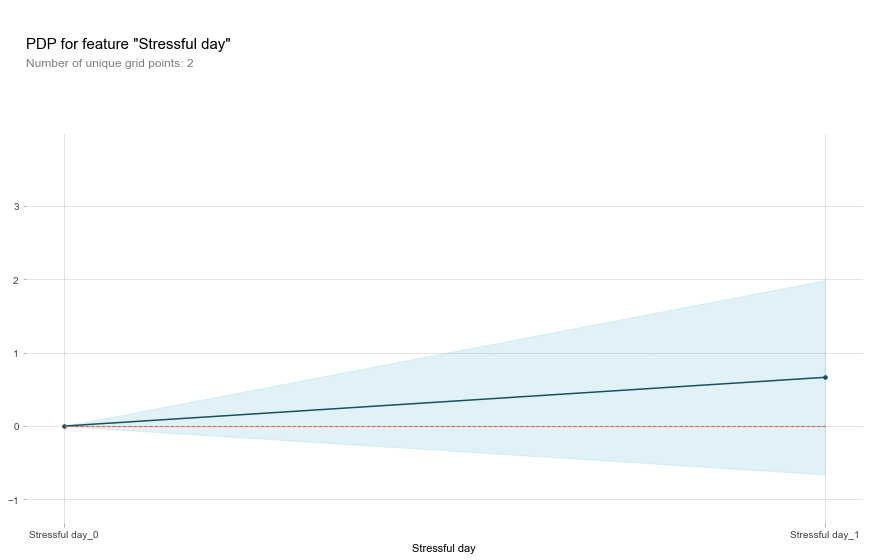

In [193]:
feature = 'Stressful day'

isolate = pdp_isolate(
    model_rf2,
    dataset=X_val, # USE YOUR VALIDATION DATA
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);

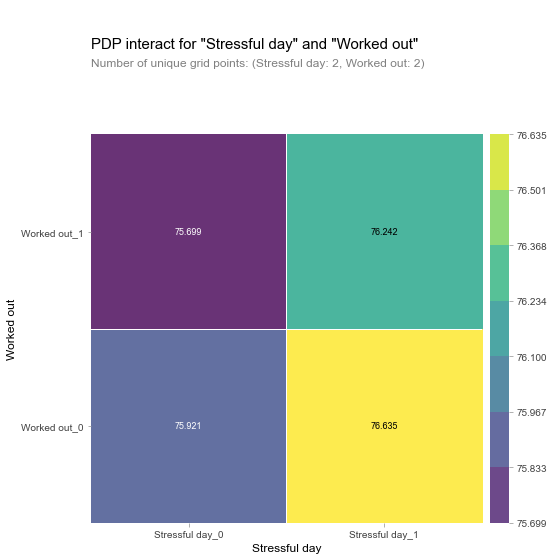

In [194]:
features = ['Stressful day', 'Worked out']

interact = pdp_interact(
    model_rf2,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);